Answer 1: while implementing gradient descent it doesn't matter which training example occurs in what order, for example in linear regression the cost function is given by summation of (h(theta) - y)^2/2*no.of examples), since it is a summation therefore it doesn't matter wether a certain example occurs at any position, but in case of a stochastic batch gradient descent, since the entire dataset is divided in different sub sets and in them full batch gradient descent is implemented, therefore in this case shuffeling is essential.

In [57]:
import numpy as np
import pandas as pd
from sklearn import model_selection as lr
from matplotlib import pyplot as plt
data = pd.read_csv('test.csv')

In [58]:
dataset = data
print(data)

      x          y
0    77  79.775152
1    21  23.177279
2    22  25.609262
3    20  17.857388
4    36  41.849864
..   ..        ...
295  71  68.545888
296  46  47.334876
297  55  54.090637
298  62  63.297171
299  47  52.459467

[300 rows x 2 columns]


In [59]:
x = data.iloc[:,0].values
y = data.iloc[:,1].values

In [60]:
x_train,x_test,y_train,y_test = lr.train_test_split(x,y,test_size = 0.7)

In [61]:
m = y_train.size

In [62]:
x_test

array([ 87,  59,   4,  62,  32,  69, 100,  65,  87,  44,  58,  61,  60,
        87,  14,  73,  43,  94,  33,  68,  21,  58,  31,  40,  48,  48,
        27,  27,  46,  97,  25,  72,  79,  77,  77,  32,  73,  45,  12,
        46,  53,  78,  80,  55,  56,   4,  13,  41,  59,  18,  39,  58,
        16,  19,  16,  93,  64,  82,   0,   5,  78,  19,  69,  96,  56,
        72,  94,  71,  64,   9,  13,  13,  14,  90,  99,  92,  17,  64,
        66,  21,  23,  34,  51,  37,  91,  47,  65,  54,  55,  16,  41,
        77,  40,  15,  21,  32,  74,   2,  19,  60,  37,  28,  75,  61,
        72,  80,  53,  12,  97,  23,  89,   0,  25,  37,  13,  96,  43,
        65,  70,  68,  59,  23,  36,  12,  97,  71,  91,  46,  33,   5,
        30,   1,   4,  60,  91,  31,  12,  39,   7,  53,  90,  78,  42,
        93,  57,  29,  96,  89,  38,  84,  95,   6,  35,  84,  46,  59,
        26,   2,  88,  51,  21,  82,  82,  76,  17,  63,  73,  28,  55,
        33,  12,  13,  46,  67,  61,  63,  88,  28,  42,  54,  1

In [63]:
X = np.array([np.ones(m),x_train]).reshape(m,2)
Y = np.array(y_train).reshape(-1,1)
X.shape

(90, 2)

In [64]:
def Cost(X,y,theta,m):
    J = 0
    J = (1/(2*m))*np.sum(np.square(np.dot(X,theta)-y))
    return J

In [65]:
def R_square(y_t,y_p):
    y_mean = np.sum(y_t)/y_t.size
    r = 1 - (np.sum(np.square(y_t-y_p))/np.sum(np.square(y_t-y_mean)))
    return r

In [66]:
def MSR(y_t,y_p):
    r = np.sum(np.square(y_t-y_p))/y_t.size
    return r

In [67]:
def predict(x,theta):
    y = theta[1]*x - theta[0]
    return y

In [68]:
def Model(X,Y,m,itr,x_test,y_test,y_train):
    t = [0,0]
    theta = np.array(t).reshape(-1,1)
    for i in range(itr):
        theta = theta - 0.0001*(1/m)*np.dot(np.transpose(X),(np.dot(X,theta)-Y))
    y_p_train = np.empty((0,1),float)
    for i in range(x_train.size):
        y_p_train = np.append(y_p_train,predict(x_train[i],theta))
    y_p_test = np.empty((0,1),float)
    for i in range(x_test.size):
        y_p_test = np.append(y_p_test,predict(x_test[i],theta))
    err_train = MSR(y_train,y_p_train)
    err_test = MSR(y_test,y_p_test)
    return err_test, err_train

In [71]:
err_test = []
err_train = []
itr = []
for i in range (1,101):
    itr.append(i)
for j in range (0,100):
    x1, x2 = Model(X,Y,m,itr[j],x_test,y_test,y_train)
    err_test.append(x1)
    err_train.append(x2)

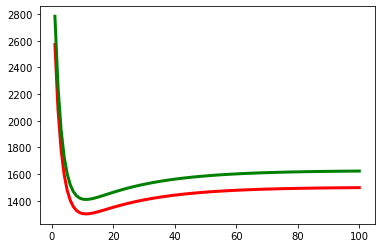

In [72]:
plt.plot(itr,err_test,color = 'red', linewidth = 3, label = 'line1')
plt.plot(itr,err_train,color = 'green', linewidth = 3, label = 'line2')

the above graph shows how error in the test data and train data changes with change in no. of iterations. I we choose the no. of iterations below 10 then we will have the problem of underfitting.  

In [73]:
def Model_alpha(X,Y,m,alpha,x_test,y_test,y_train):
    t = [0,0]
    theta = np.array(t).reshape(-1,1)
    for i in range(50):
        theta = theta - alpha*(1/m)*np.dot(np.transpose(X),(np.dot(X,theta)-Y))
    y_p_train = np.empty((0,1),float)
    for i in range(x_train.size):
        y_p_train = np.append(y_p_train,predict(x_train[i],theta))
    y_p_test = np.empty((0,1),float)
    for i in range(x_test.size):
        y_p_test = np.append(y_p_test,predict(x_test[i],theta))
    err_train = MSR(y_train,y_p_train)
    err_test = MSR(y_test,y_p_test)
    return err_test, err_train

In [74]:
alpha = []
err_tst = []
err_trn = []
for i in range(1,101):
    alpha.append(0.000001*i)
for i in range (100):
    x1,x2 = Model_alpha(X,Y,m,alpha[i],x_test,y_test,y_train)
    err_tst.append(x1)
    err_trn.append(x2)

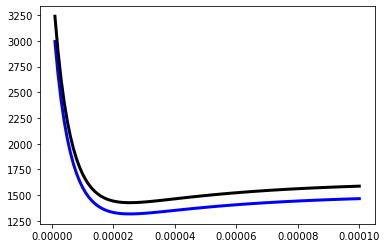

In [75]:
plt.plot(alpha,err_tst,color = 'blue', linewidth = 3, label = 'line1')
plt.plot(alpha,err_trn,color = 'black', linewidth = 3, label = 'line2')

the above graph shows how error depends on the value of the learning rate alpha. Here also chossing alpha less than 0.00002 will lead to underfitting. Note that this graph shows error upto learning rate = 0.0001, but after a certain value of learning rate greater than 0.0001 will lead to exploding gradient descent. 

Answer 3: The expected value of the MSE depends on both bias and variance, Because of this reason understanding reason bias variance trade off is very important. Variance means the change in the hypothesis function due to change in the dataset being used for training whereas bias refers to the error generated due to applying simpler models to the given dataset rather than the actual one. A flexible/complex model has high variance although we would want our model to change less between different datasets but high variance also means that our model fits the given dataset well. A complex model has low bias, since most of the real life problems are complex therefore its evident from the definition that more complex models will have low bias. The bias and variance are related in a way that increasing bias leads to decrease in variance. This can be proved intutively, as we increase the complexity of our model, its variance increases, at the same time its bias decreases. The MSE value depends on the relative rate at which variance decrease and the bias increase, if the rate of decrease of bias is more than the rate of increase of variance then the expected value of MSE decreases this means performance of our model improves. But as the rate of decrease of bias becomes less than rate of increase of variance then MSE increases, therefore a middle value for the least MSE can be found when rate of decrese of bias equals rate of increase of variance, this compromise in value of bias and variance is known as bias variance trade off.